# Data Science Internship Task1 and Task2

## Task 1: Titanic Survival Classification

* Use the Titanic dataset, build a machine learning model to predict whether a
passenger survived or not based on features like age, gender, ticket class, and fare.
Your task is to clean and preprocess the data, train a classification model, and
evaluate its performance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
Titanic=sns.load_dataset("titanic") #importing Data

In [3]:
Titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
Titanic["class"].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [5]:
Titanic["class"]=Titanic["class"].map({'Third':2, 'First':0, 'Second':1})  #MAp

In [6]:
#Map using LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [7]:
encode=LabelEncoder()

In [8]:
Titanic["sex"]=encode.fit_transform(Titanic.sex)
Titanic["embarked"]=encode.fit_transform(Titanic.embarked)
Titanic["who"]=encode.fit_transform(Titanic.who)
Titanic["adult_male"]=encode.fit_transform(Titanic.adult_male)
Titanic["deck"]=encode.fit_transform(Titanic.deck)
Titanic["embark_town"]=encode.fit_transform(Titanic.embark_town)
Titanic["alive"]=encode.fit_transform(Titanic.alive)
Titanic["alone"]=encode.fit_transform(Titanic.alone)

In [9]:
mean=Titanic["age"].mean()

In [10]:
Titanic['age']=Titanic['age'].fillna(mean)

In [11]:
Titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

<Axes: >

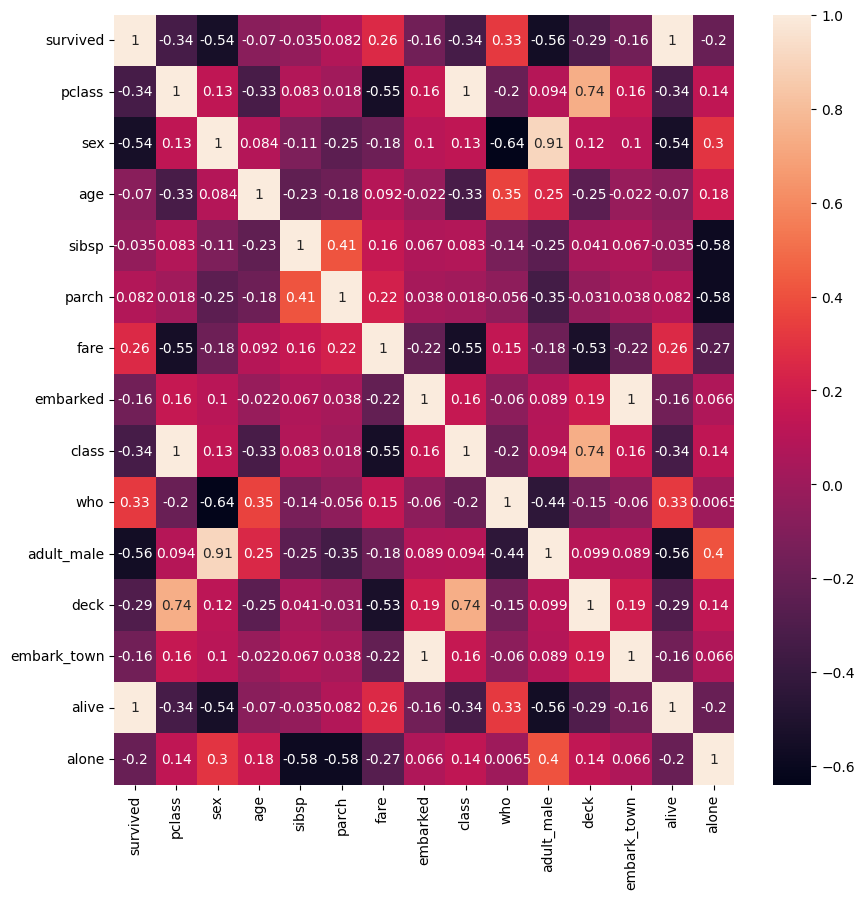

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(Titanic.corr(),annot=True)

In [13]:
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,7,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,7,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,7,2,0,1


In [14]:
x=Titanic.iloc[:,1:]  #Set X=All but not survived
y=Titanic.iloc[:,0]   #Set y=Survived

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) #Split Data

In [17]:
lr_classifier=LogisticRegression() 

In [18]:
lr_classifier.fit(x_train,y_train)     #Train Module

C:\Users\H S COMPUTER S HYD\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
y_test_pred=lr_classifier.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix

<Axes: >

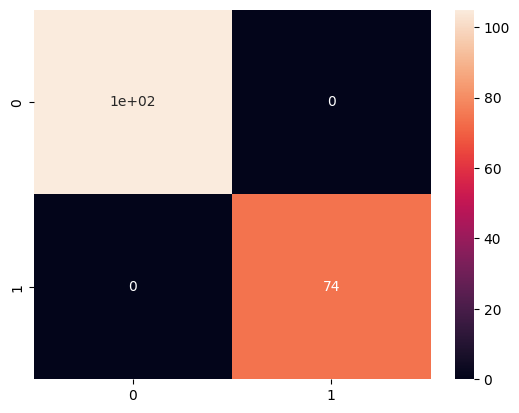

In [21]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)

In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [23]:
print("test accuracy:",accuracy_score(y_test,y_test_pred))
print("recall:",recall_score(y_test,y_test_pred))
print("precision:",precision_score(y_test,y_test_pred))
print("f1:",f1_score(y_test,y_test_pred))

test accuracy: 1.0
recall: 1.0
precision: 1.0
f1: 1.0


In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [27]:
print("Mean_Absulute_Error",mean_absolute_error(y_test,y_test_pred))
print("R2_Score",r2_score(y_test,y_test_pred))
print("Mean_Squared_Error",mean_squared_error(y_test,y_test_pred))

Mean_Absulute_Error 0.0
R2_Score 1.0
Mean_Squared_Error 0.0


## COMPLETE

# Task 2: Stock Price Prediction
* Build a model to predict future stock prices based on historical stock data, including
features like opening price, closing price, high, low, and trading volume. Your task is
to preprocess the data, choose a suitable model (e.g., linear regression or LSTM),
train it, and evaluate its prediction accuracy.

In [28]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import yfinance as yf

In [40]:
df=yf.download("AAPL")

[*********************100%***********************]  1 of 1 completed


In [42]:
df.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [43]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-12-03,284.149994,288.619995,283.299988,286.200012,43538700
2025-12-04,280.700012,284.730011,278.589996,284.100006,43989100
2025-12-05,278.779999,281.140015,278.049988,280.540009,47265800
2025-12-08,277.890015,279.670013,276.149994,278.130005,38211800
2025-12-09,277.179993,280.029999,276.920013,278.160004,32193300


In [44]:
y=df.iloc[:,1].round(0)  #y=close
df=df.drop("Close",axis=1)
x=df.iloc[:,:].round(0) #x=all not close
 

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42) #Split Data

In [46]:
lr_class=LogisticRegression()

In [47]:
lr_class.fit(x_train,y_train)

C:\Users\H S COMPUTER S HYD\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [48]:
y_pred=lr_class.predict(x_test)

In [49]:
print("test accuracy:",accuracy_score(y_test,y_pred))

test accuracy: 0.16666666666666666


In [50]:
print("Mean_Absulute_Error",mean_absolute_error(y_test,y_pred))
print("R2_Score",r2_score(y_test,y_pred))
print("Mean_Squared_Error",mean_squared_error(y_test,y_pred))

Mean_Absulute_Error 6.166666666666667
R2_Score -1.4108761329305137
Mean_Squared_Error 66.5


* Stock price prediction is a regression problem because the output is continuous